# Configuraciones Preliminares

## Importación de archivos

In [1]:
!wget https://github.com/DiegoPincheiraIb/EL7008_Assignments/raw/main/Assignment_4/imagenes_tarea4_2020.zip

--2022-02-23 22:19:49--  https://github.com/DiegoPincheiraIb/EL7008_Assignments/raw/main/Assignment_4/imagenes_tarea4_2020.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DiegoPincheiraIb/EL7008_Assignments/main/Assignment_4/imagenes_tarea4_2020.zip [following]
--2022-02-23 22:19:50--  https://raw.githubusercontent.com/DiegoPincheiraIb/EL7008_Assignments/main/Assignment_4/imagenes_tarea4_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4461117 (4.3M) [application/zip]
Saving to: ‘imagenes_tarea4_2020.zip’

imagenes_tarea4_202 100%[===================>]   4.25M  --.-KB/s    in 0.09s  

In [2]:
!unzip imagenes_tarea4_2020.zip

Archive:  imagenes_tarea4_2020.zip
   creating: car_side/
 extracting: car_side/image_0001.jpg  
  inflating: car_side/image_0002.jpg  
 extracting: car_side/image_0003.jpg  
 extracting: car_side/image_0004.jpg  
 extracting: car_side/image_0005.jpg  
 extracting: car_side/image_0006.jpg  
 extracting: car_side/image_0007.jpg  
 extracting: car_side/image_0008.jpg  
 extracting: car_side/image_0009.jpg  
 extracting: car_side/image_0010.jpg  
 extracting: car_side/image_0011.jpg  
 extracting: car_side/image_0012.jpg  
 extracting: car_side/image_0013.jpg  
 extracting: car_side/image_0014.jpg  
 extracting: car_side/image_0015.jpg  
 extracting: car_side/image_0016.jpg  
 extracting: car_side/image_0017.jpg  
 extracting: car_side/image_0018.jpg  
 extracting: car_side/image_0019.jpg  
 extracting: car_side/image_0020.jpg  
 extracting: car_side/image_0021.jpg  
 extracting: car_side/image_0022.jpg  
 extracting: car_side/image_0023.jpg  
 extracting: car_side/image_0024.jpg  
 extra

In [3]:
!ls

car_side  chair  imagenes_tarea4_2020.zip  pedestrian  sample_data


## Librerías

In [4]:
!pip install sparse

     |████████████████████████████████| 77 kB 3.5 MB/s 


In [5]:
!pip install ipython-autotime

In [6]:
!pip install -U opencv-python

     |████████████████████████████████| 60.4 MB 29 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [7]:
%load_ext autotime

time: 110 µs (started: 2022-02-23 22:20:33 +00:00)


In [8]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier

time: 977 ms (started: 2022-02-23 22:20:33 +00:00)


In [9]:
%load_ext Cython

time: 726 ms (started: 2022-02-23 22:20:34 +00:00)


# Funciones

## Proc_Img()

Dado una imagen objetivo, esta función transforma a escala de grises dicha imagen, luego la redimensiona a 64 x 128 pixeles, y por último retorna dicha imagen transformada en formato np.float32.

In [10]:
def Proc_Img(Img_Obj):
  Img_Gris = cv2.cvtColor(Img_Obj, cv2.COLOR_BGR2GRAY)# Transformar a escala de grises
  Img_Final = cv2.resize(Img_Gris,(64,128)) # Redimensionar Imagen
  return Img_Final.astype(np.float32)

time: 2.42 ms (started: 2022-02-23 22:20:35 +00:00)


## Convolution_cython()

Esta función recibe una matriz y una máscara, retornando la convolución entre ambos elementos. El procedimiento se realiza pixel a pixel. Cabe destacar que es la misma función utilizada en la Tarea 1.

In [11]:
%%cython
import cython
import numpy as np
cimport numpy as np

#@cython.boundscheck(False)
cpdef float[:, :] convolution_cython(float [:, :] input, float [:, :] mask):
  cdef int r, c, rows, cols, Rows_Mask,Cols_Mask ,Centro_Rows_Mask ,Centro_Cols_Mask 
  cdef float sum
  cdef np.ndarray output=np.zeros((input.shape[0],input.shape[1]), dtype = np.float32)

  # Tamano de la imagen
  rows = input.shape[0]
  cols = input.shape[1]

  # Tamaño de la máscara:
  Rows_Mask = mask.shape[0]
  Cols_Mask = mask.shape[1]

  Centro_Rows_Mask = Rows_Mask//2 + 1
  Centro_Cols_Mask = Cols_Mask//2 + 1

  # Se implementa convolucion entre "input" y "mask"
  for r in range(rows):
    for c in range(cols):
      sum = 0
      for index_rows_mask in range(-Centro_Rows_Mask +1, Centro_Rows_Mask):
        for index_cols_mask in range(-Centro_Cols_Mask + 1, Centro_Cols_Mask):
          Indices_Kernel_Rows = index_rows_mask + Centro_Rows_Mask -1
          Indices_Kernel_Cols = index_cols_mask + Centro_Cols_Mask -1
          new_i = r + index_rows_mask
          new_j = c + index_cols_mask
          if (new_i >=0 and new_i<rows and new_j >=0 and new_j < cols):
            sum += mask[Indices_Kernel_Rows,Indices_Kernel_Cols] * input[new_i, new_j]
      output[r, c] = sum
  return output

time: 7.77 s (started: 2022-02-23 22:20:35 +00:00)


## Gradientes

Se implementan dos funciones utilizando el **Operador Sobel**, siendo este  un operador diferencial discreto que calcula una aproximación al gradiente de la intensidad de una imagen. Este se divide en dos Kernels, representados aquí por dos funciones: GradX() y GradY(). La primera permite calcular el gradiente en la dirección X de un elemento objetivo, mientras que la segunda permite calcular el gradiente en la dirección Y de dicho elemento. Estos Kernels se convolucionan mediante la función **convolution_cython**, entregando los gradientes correspondientes.

### GradX()

In [12]:
%%cython
import cython
import numpy as np
cimport numpy as np

from __main__ import convolution_cython


cpdef float[:, :] gradx(float [:, :] input):
  cdef np.ndarray Grad_X=np.zeros([input.shape[0], input.shape[1]], dtype = np.float32)
  cdef np.ndarray Elem_V = np.array([[1.],[2.],[1.]], dtype = np.float32) # Kernel 1
  cdef np.ndarray Elem_H = np.array([-1.,0.,1.], dtype = np.float32) # Kernel 2
  # Se convoluciona el producto de los kernels con la imagen de entrada
  Grad_X = np.float32(convolution_cython(input, Elem_V * Elem_H))
  return Grad_X

time: 6.79 s (started: 2022-02-23 22:20:43 +00:00)


### GradY()

In [13]:
%%cython
import cython
import numpy as np
cimport numpy as np
from __main__ import convolution_cython

cpdef float[:, :] grady(float [:, :] input):
  cdef np.ndarray Grad_Y=np.zeros([input.shape[0], input.shape[1]], dtype = np.float32)
  cdef np.ndarray Elem_V = np.array([[-1.],[0.],[1.]], dtype = np.float32) # Kernel 1
  cdef np.ndarray Elem_H = np.array([1.,2.,1.], dtype = np.float32) # Kernel 2
  # Se convoluciona el producto de los kernels con la imagen de entrada
  Grad_Y = np.float32(convolution_cython(input, Elem_V * Elem_H))

  return Grad_Y

time: 4.5 s (started: 2022-02-23 22:20:49 +00:00)


## HoG

Se procede a elaborar una serie de funciones que permiten implementar el método HoG.

### computeHoG()

Dado dos gradientes de una imagen (correspondientes al gradiente en la dirección X y en la dirección Y), **entrega un histograma ponderado a partir de la magnitud y ángulo presente en cada pixel**.

In [14]:
import cv2
from numba import jit
@jit(nopython=True)

def computeHog(gradx, grady):
  Mag = np.sqrt(np.power(gradx, 2)+ np.power(grady, 2)) # Se calcula la magnitud a partir de los gradientes
  Angle = (np.arctan2(grady, gradx)* 180 / np.pi) + 180 # Se calcula el ángulo a partir de los gradientes
  for i in range(len(Angle)):
    for j in range(len(Angle[0])):
      if Angle[i,j] >= 180:
        Angle[i,j] = Angle[i,j]-180 # Se ajustan los ángulos al rango [0,180)
  Histogramas = np.zeros((16,8,9))
  # Se divide la imagen de 128x64 en celdas de 8x8, resultando 16x8 celdas:
  for i in range(16): 
    for j in range(8): 
      New_Hist = np.zeros((9)) # Se inicializa un histograma de 9 bines (del 0 al 160) para una celda
      # Se calculan los histogramas iterando pixel a pixel las celdas:
      for k in range(8): 
        for l in range(8):
          # Se extrae la magnitud y el ángulo del pixel, y se calcula el valor del bin inferior     
          Angulo = Angle[8*i + k,8*j + l]
          Magnitud = Mag[8*i + k,8*j + l]
          Cuociente_Obj = int(Angulo / 20) 
          Bin_Obj = 20 * Cuociente_Obj
          # Como se tiene 9 bines (de 0 a 160), se divide en dos casos:
          if Angulo >= 160: 
            # Se calculan los valores de cada bin y se guardan en los bines respectivos.
            Prim_Valor = (Bin_Obj + 20 - Angulo)*Magnitud/20
            Seg_Valor = (Angulo - Bin_Obj)*Magnitud/20
            New_Hist[-1] += Prim_Valor
            New_Hist[0] += Seg_Valor
          else: 
            # # Se calculan los valores de cada bin y se guardan en los bines respectivos.
            Prim_Valor = (Bin_Obj + 20 - Angulo)*Magnitud/20 
            Seg_Valor = (Angulo - Bin_Obj)*Magnitud/20
            New_Hist[Cuociente_Obj] += Prim_Valor
            New_Hist[Cuociente_Obj+1] += Seg_Valor
      Histogramas[i][j] = New_Hist # Se guarda el histograma 
  return Histogramas


time: 721 ms (started: 2022-02-23 22:20:54 +00:00)


### Calculo_Vector()

Esta función calcula un vector de características a partir de un conjunto de histogramas contenidos en una matriz, concatenando estos mediante un recorrido con traslape tomando 4 histogramas a su vez, normalizando estos antes de guardarlos en el vector de características final.

In [15]:
from numba import jit
@jit(nopython=True)

def Calculo_Vector(Hist_Obj):
  Vector_Caract = np.zeros((3780))
  # Se recorren las celdas
  for i in range(15): # Se omite la última fila
    for j in range(7): # Se omite la última columna
      # Se concatenan los histogramas correspondientes a la celda actual, la celda en la siguiente fila,
      # en la siguiente columna, y en la siguiente fila y columna, formando un vector de 1x36.
      Vector_Aux = np.concatenate((Hist_Obj[i,j],Hist_Obj[i+1,j],Hist_Obj[i,j+1],Hist_Obj[i+1,j+1]),axis = 0)
      # Se normalizan los vectores de características:
      if np.sqrt(np.sum(Vector_Aux**2)) != 0:
        Vect_Aux_Norm = Vector_Aux / np.sqrt(np.sum(Vector_Aux**2)) 
      else:
        Vect_Aux_Norm = np.zeros((36))
      Index = len(Vector_Aux)*(i*7+j)
      Vector_Caract[Index:Index + 36] = Vect_Aux_Norm
  return Vector_Caract.reshape((1, 3780))

time: 12.8 ms (started: 2022-02-23 22:20:55 +00:00)


### Calculador_CaractHoG()

Esta función calcula las características HoG a partir de una imagen objetivo. Para esto, procesa la imagen con la función Proc_Img(), obteniendo gradientes en la dirección X e Y. Estos serán utilizados en conjunto con la función computeHoG() para generar una matriz de histogramas, siendo esta última utilizada para generar el vector de características mediante Calculo_Vector().

In [16]:
 def Calculador_CaractHoG(Img_Obj):
  Img_Gris = Proc_Img(Img_Obj)
  imx = np.float32(gradx(Img_Gris))
  imy = np.float32(grady(Img_Gris))
  Histogr = computeHog(imx, imy)
  Vector = Calculo_Vector(Histogr)
  return Vector

time: 4.01 ms (started: 2022-02-23 22:20:55 +00:00)


## Constructor_Clasificador()

Dado un tipo de Kernel, un booleando, una cantidad de *Folds*, y un diccionario de parámetros, retorna un **clasificador SVM** óptimo bajo los elementos entregados a la función mediante el uso de **GridSearchCV**.

In [17]:
def Constructor_Clasificador(Tipo_Kernel, Probabilidad, N_Folds, Parametros):
  Clasificador_SVM = svm.SVC(kernel=Tipo_Kernel, probability=Probabilidad,decision_function_shape='ovr')
  Clasificador_Optimo = GridSearchCV(estimator=Clasificador_SVM, cv=N_Folds, param_grid= Parametros )
  return Clasificador_Optimo

time: 8.53 ms (started: 2022-02-23 22:20:55 +00:00)


# Procesamiento

Se genera el listado de nombres de cada archivo de los tres tipos (Autos, Sillas, y Transeuntes). Posteriormente se generan las matrices de vectores de características para los tres conjuntos utilizando Calculador_CaractHoG() para cada elemento, en conjunto con elaborar un vector de clases para cada conjunto, donde los transeuntes son asociados a una clase "1", mientras que el resto es determinado como clase "0". Luego, cada uno de las tres matrices de características y sus clases asociadas se dividen en un conjunto de entrenamiento y validación utilizando train_test_split(). Posteriormente estos se concatenan entre sí, generando finalmente un solo conjunto de entrenamiento y validación con sus respectivas clases. Una vez obtenidos los conjuntos finales, se entrena un estandarizador utilizando StandardScaler() con el conjunto de entrenamiento, aplicando este operador a los conjuntos.

Con los conjuntos de entrenamiento y validación, se lleva a cabo el entrenamiento de dos clasificadores:

*   Utilizando la función Constructor_Clasificador(), se genera un **clasificador SVM con kernel RBF** utilizando GridSearchCV, entrenando este con el conjunto de entrenamiento, prediciendo a continuación los datos provenientes del conjunto de prueba.
*   Se genera un **clasificador RandomForest** utilizando la función RandomForestClassifier(), entrenando este con el conjunto de entrenamiento, prediciendo a continuación los datos provenientes del conjunto de prueba.



In [18]:
# Se generan los directorios de acceso a las imágenes
Autos = os.listdir('car_side/')
Sillas = os.listdir('chair/')
Transeuntes = os.listdir('pedestrian/')

time: 4.17 ms (started: 2022-02-23 22:20:55 +00:00)


In [19]:
#Se generan las características preliminares y sus clases
Cjto_Autos = np.zeros((len(Autos),3780))
Clases_Autos = np.zeros((len(Autos),1))
for i in range(len(Autos)):
  Cjto_Autos[i,:] = Calculador_CaractHoG(cv2.imread('car_side/' + Autos[i]))

Cjto_Sillas = np.zeros((len(Sillas),3780))
Clases_Sillas = np.zeros((len(Sillas),1))
for i in range(len(Sillas)):
  Cjto_Sillas[i,:] = Calculador_CaractHoG(cv2.imread('chair/' + Sillas[i]))

Cjto_Transeuntes = np.zeros((len(Transeuntes),3780))
Clases_Transeuntes = np.ones((len(Transeuntes),1))
for i in range(len(Transeuntes)):
  Cjto_Transeuntes[i,:] = Calculador_CaractHoG(cv2.imread('pedestrian/' + Transeuntes[i]))

time: 16.4 s (started: 2022-02-23 22:20:55 +00:00)


In [20]:
# Se procede a dividir en conjuntos de entrenamiento y validación.
X_Autos_train, X_Autos_Val, y_Autos_train, y_Autos_Val = train_test_split(Cjto_Autos, Clases_Autos, train_size=0.7, stratify=Clases_Autos)
X_Sillas_train, X_Sillas_Val, y_Sillas_train, y_Sillas_Val = train_test_split(Cjto_Sillas, Clases_Sillas, train_size=0.7, stratify=Clases_Sillas)
X_Transe_train, X_Transe_Val, y_Transe_train, y_Transe_Val = train_test_split(Cjto_Transeuntes, Clases_Transeuntes, train_size=0.7, stratify=Clases_Transeuntes)

time: 19.9 ms (started: 2022-02-23 22:21:11 +00:00)


In [21]:
# Se crean los conjuntos de entrenamiento y validación finales
X_Train_Final = np.concatenate((X_Autos_train,X_Sillas_train,X_Transe_train))
X_Val_Final = np.concatenate((X_Autos_Val,X_Sillas_Val,X_Transe_Val))
Y_Train_Final = np.concatenate((y_Autos_train,y_Sillas_train,y_Transe_train))
Y_Val_Final = np.concatenate((y_Autos_Val,y_Sillas_Val,y_Transe_Val))

# Se aplica un estandarizador: StandardScaler()
Estandarizador = StandardScaler().fit(X_Train_Final)
X_Train_Final = Estandarizador.transform(X_Train_Final)
X_Val_Final = Estandarizador.transform(X_Val_Final)

time: 30.7 ms (started: 2022-02-23 22:21:11 +00:00)


## Clasificador SVM

Accuracy del conjunto de Validación: 0.9910714285714286


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


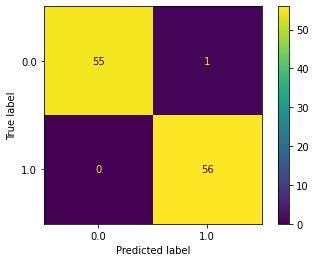

time: 12.9 s (started: 2022-02-23 22:21:11 +00:00)


In [22]:
Valores_C = [0.01,0.1,1,10,100]
Sigmas = [0.0001, 0.001, 0.01, 0.1, 1]
Parametros = {'C': Valores_C, 'gamma' : Sigmas}  
Clasificador_RBF = Constructor_Clasificador('rbf', False, 5, Parametros)
Clasificador_RBF.fit(X_Train_Final,Y_Train_Final.ravel()) # Entrenamiento del clasificador
Clases_Prediccion_RBF = Clasificador_RBF.predict(X_Val_Final) # Pruebo el clasificador con conjunto Validación
# Metricas:
print("Accuracy del conjunto de Validación:",metrics.accuracy_score(Y_Val_Final.ravel(), Clases_Prediccion_RBF)) # Mido la exactitud
plot_confusion_matrix(Clasificador_RBF, X_Val_Final, Y_Val_Final.ravel())
plt.show()

## Clasificador RandomForest

Accuracy del conjunto de Validación: 0.9821428571428571


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


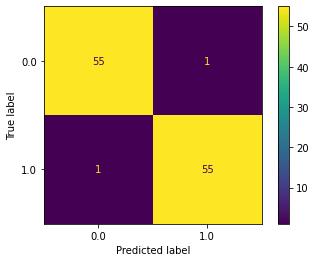

time: 793 ms (started: 2022-02-23 22:21:24 +00:00)


In [23]:
Clasificador_RandomForest = RandomForestClassifier()
Clasificador_RandomForest.fit(X_Train_Final,Y_Train_Final.ravel()) # Entrenamiento del clasificador
Clases_Prediccion_RandomF = Clasificador_RandomForest.predict(X_Val_Final) # Pruebo el clasificador con conjunto Validación
# Metricas:
print("Accuracy del conjunto de Validación:",metrics.accuracy_score(Y_Val_Final.ravel(), Clases_Prediccion_RandomF)) # Mido la exactitud
plot_confusion_matrix(Clasificador_RandomForest, X_Val_Final, Y_Val_Final.ravel())
plt.show()